##### Task: build a deep learning classification model to determine if there will be listing gains for the IPO, for an investment firm that is interested in investing in the Initial Public Offerings (IPO) in the Indian market. 

##### Data Source: https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

2023-09-15 20:10:22.814213: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


##### Data Dictionary
-- columns:

* Date: date when the IPO was listed

* IPOName: name of the IPO

* Issue_Size: size of the IPO issue, in INR Crores

* Subscription_QIB: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

* Subscription_HNI: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

* Subscription_RII: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

* Subscription_Total: total number of times the IPO was subscribed overall

* Issue_Price: the price in INR at which the IPO was issued

* Listing_Gains_Percent: is the percentage gain in the listing price over the issue price

In [2]:
df = pd.read_csv("Indian_IPO_Market_Data.csv")
df

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


In [3]:
print("shape of df: ", df.shape, "\n\n")
print("info with all cols: \n", df.info(), "\n\n")
print("summary statistics - Listing_Gains_Percent: \n", df["Listing_Gains_Percent"].describe(), "\n\n")
print("summary statistics with all cols: \n", df.describe(), "\n\n")

shape of df:  (319, 9) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB
info with all cols: 
 None 


summary statistics - Listing_Gains_Percent: 
 count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000

In [4]:
df["Listing_Gains_Profit"] = np.where(df["Listing_Gains_Percent"]>0, 1, 0)
print("missing val of col categorical_target: ", df["Listing_Gains_Profit"].isnull().sum())

missing val of col categorical_target:  0


In [5]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696,0.545455
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000,1.000000


value_counts of target variable :
 1    174
0    145
Name: Listing_Gains_Profit, dtype: int64


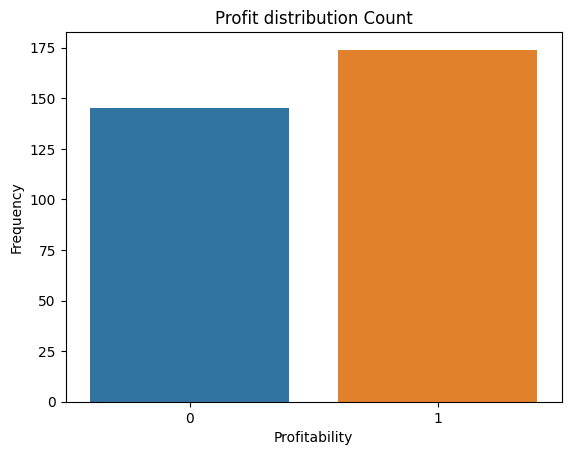

In [6]:
# Distribution of target_variable - average IPO tends to list a profit 
print("value_counts of target variable :\n", df["Listing_Gains_Profit"].value_counts())
sns.countplot(x='Listing_Gains_Profit', data = df)
plt.title('Profit distribution Count')
plt.xlabel('Profitability')
plt.ylabel('Frequency')
plt.show()

## Setting the Target and Predictor Variables

In [7]:
drop_cols = ["Date ", "IPOName"]
target = 'Listing_Gains_Profit' 

predictors = list(set(df.columns)-set(drop_cols)-set(target))  # Replace with your actual predictor variable names

## Outliers 
    - Identify the list of variables that have outliers in the data, and replace values exceed upper/lower_bounds into upperbound/lowerbound values

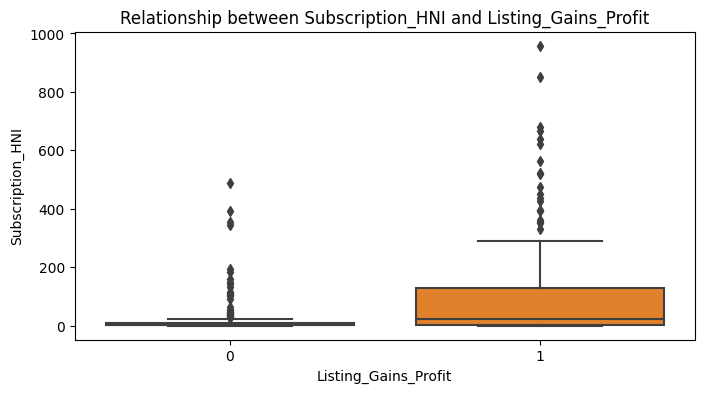

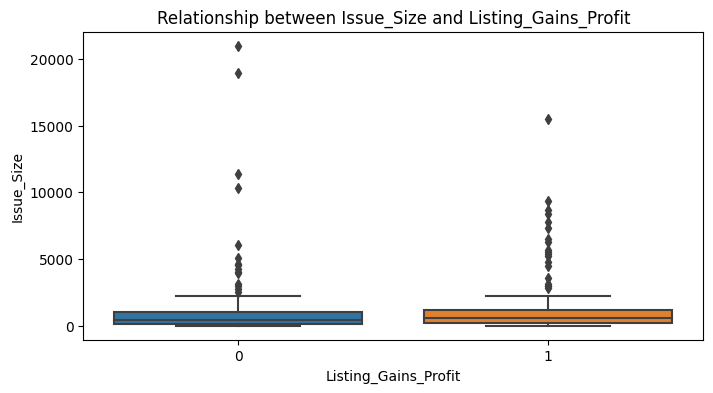

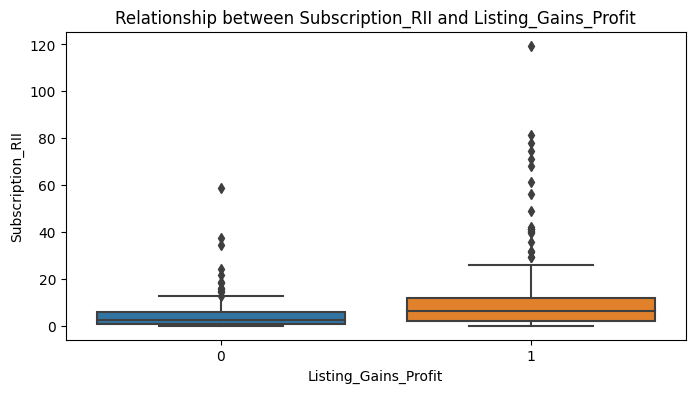

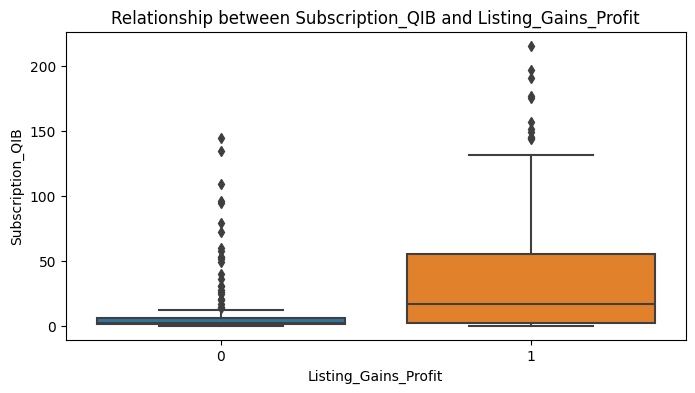

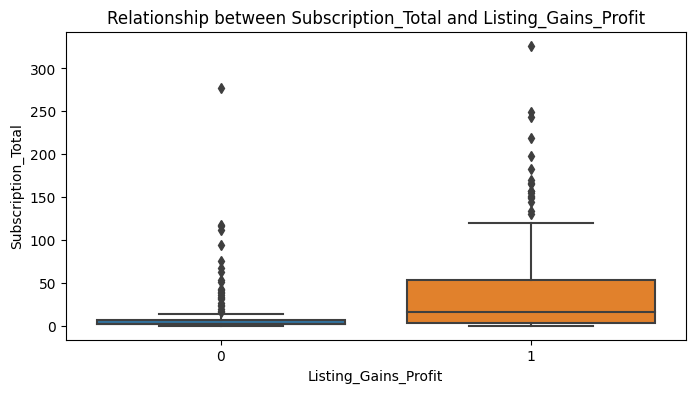

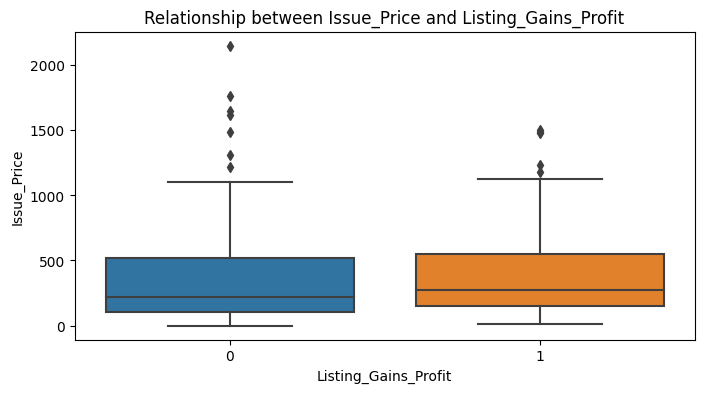

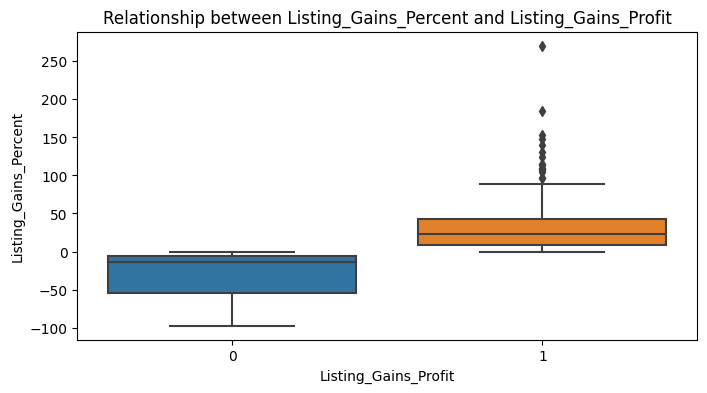

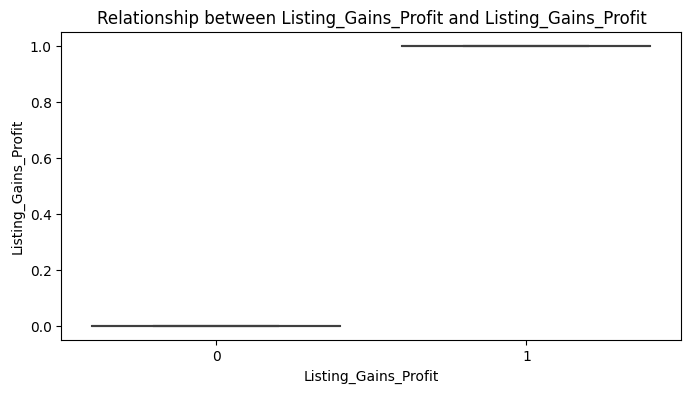

In [8]:

# Create subplots for each predictor variable
for predictor in predictors:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target, y=predictor, data=df)
    plt.title(f'Relationship between {predictor} and {target}')
    plt.xlabel(target)
    plt.ylabel(predictor)
    plt.show()


/tmp/ipykernel_64/3135865189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


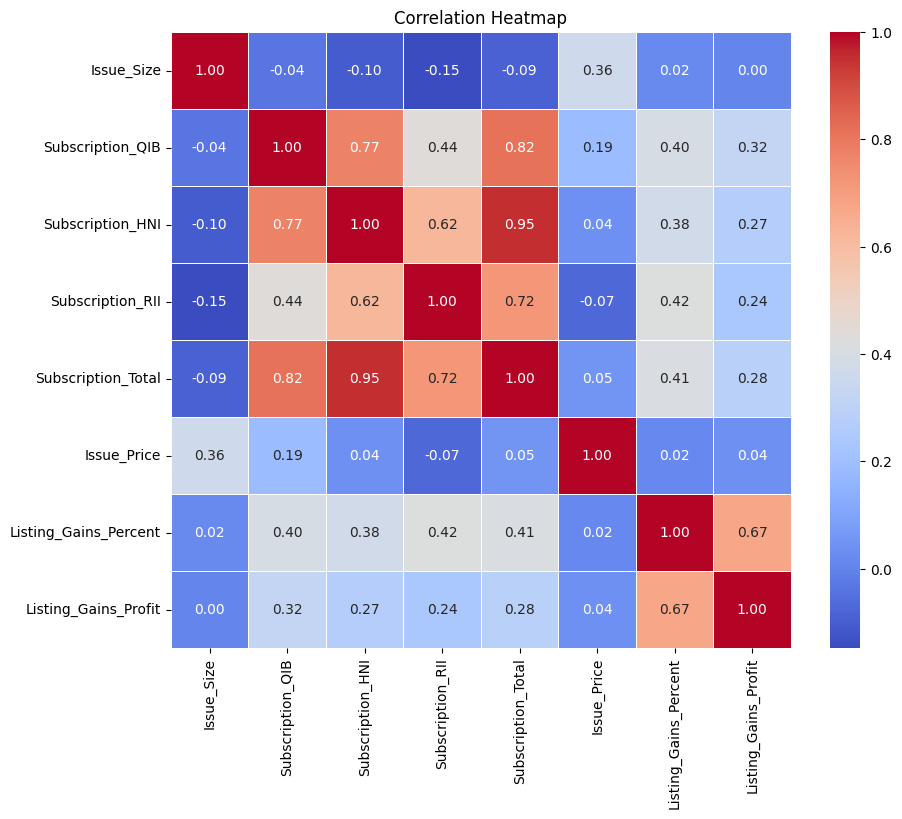

In [9]:
# only does numeric columns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# features importance
correlation_matrix['Listing_Gains_Profit'].sort_values(ascending=False)

Listing_Gains_Profit     1.000000
Listing_Gains_Percent    0.673510
Subscription_QIB         0.323499
Subscription_Total       0.283340
Subscription_HNI         0.271879
Subscription_RII         0.240842
Issue_Price              0.039548
Issue_Size               0.004717
Name: Listing_Gains_Profit, dtype: float64

In [11]:
# before removing outliers
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696,0.545455
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000,1.000000


In [12]:
outlier_cols = ["Listing_Gains_Percent" ,"Subscription_Total","Subscription_RII", "Subscription_QIB","Issue_Size","Subscription_HNI", "Issue_Price"]
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # replace the outliers values with either upper_bound or lower_bound values
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

In [13]:
# after removing outliers
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,763.561238,21.521183,40.356426,6.060940,20.456646,362.147335,3.612304,0.545455
std,769.689122,29.104549,57.427921,6.176882,27.217740,312.272967,37.929890,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.852500,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000
max,2496.492500,84.862500,153.355000,19.600000,81.020000,1161.500000,80.607500,1.000000


## Normalization

In [14]:
target = 'Listing_Gains_Profit' 
df[predictors] = df[predictors]/ df[predictors].max()

In [15]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.311793,0.044813,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.268853,0.470550,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.829358,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.102454,-0.143349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.215239,0.022454,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.461472,0.313991,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train, Test sets split

In [16]:
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

## Define the Deep Learning Classification Model
Instantiating the model

Adding the hidden layers

Selecting the activation functions

In [27]:
# Defining the model with Functional API
input_layer = tf.keras.Input(shape=(X_train.shape[1],))
hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
drop1 = tf.keras.layers.Dropout(rate=0.40)(hidden_layer1)
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.20)(hidden_layer2)
hidden_layer3 = tf.keras.layers.Dense(16, activation='relu')(drop2)
hidden_layer4 = tf.keras.layers.Dense(8, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(4, activation='relu')(hidden_layer4)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer5)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [29]:
# Compile, Fit, and Evaluate the Model
optimizer = tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.BinaryCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer,              
            loss=loss,              
            metrics=metrics)
model.fit(X_train, y_train, epochs=10)

print('train: ', model.evaluate(X_train, y_train))
print('test: ', model.evaluate(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.9910
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.9955
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.9910
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 1.0000
train:  [0.2819257080554962, 1.0]
3/3 [